# Plot the path of Hurricane Florence from August 30th to September 18th of 2023



#### I will take a look at the destructive hurricane Florence and track its location.

## Packages :

- Pandas: provide data structures and data analysis tools
- Numpy: a fundamental package for scientific computing with Python
- SciPy:(pronounced “Sigh Pie”) is a Python-based ecosystem of open-source  software for mathematics, science, and engineering
- RTree: a ctypes Python wrapper of libspatialindex that provides a number of advanced spatial indexing features
- GDAL: translator library for raster and vector geospatial data formats
- Fiona: Fiona reads and writes spatial data files
- Shapely: Geometric objects, predicates, and operations
- GeoPandas: extends the datatypes used by pandas to allow spatial operations on geometric types.
- PySAL: a library of spatial analysis functions written in Python intended to support the development of high-level applications.
- Matplotlib: Python 2D plotting library
- Missingno: Missing data visualization module for Python

As you may know, the terrifying hurricane Florence just passed through part of the East Coast of the United States, leaving an estimated damage of 17 billion USD. This tutorial will help you to find out where it came from, when and where it got stronger and understand more about this natural disaster and analyze it in Python. There are many websites providing information about this hurricane. For example, this website provided data for several storms and hurricanes in the States from 1902 to 2018, so there is a ton of available data for you to work later on. For this tutorial, you will only use [the Hurricane Florence data
](http://flhurricane.com/cyclone/stormhistory.php?storm=6&year=2018)
You will also use the US map geospatial data from the internet. The blog post by Eric Celeste has all kinds of boundary data files for US counties and states. The data used in this tutorial is the US States, 5m, GeoJSON file.

In [2]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 121.5 MB/s eta 0:00:00


In [3]:
# --- Load all important packages ---
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import missingno as msn
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import requests
import contextily as cx
from io import StringIO  # To read strings as files

In [4]:
import requests

url = "https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json"
response = requests.get(url)
response.raise_for_status()

with open("gz_2010_us_500_11_20m.json", "wb") as f:
    f.write(response.content)

print("Download complete: gz_2010_us_500_11_20m.json")


Download complete: gz_2010_us_500_11_20m.json


In [6]:
country = gpd.read_file("gz_2010_us_500_11_20m.json")
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [7]:
type(country)


geopandas.geodataframe.GeoDataFrame

In [8]:
type(country.geometry)

geopandas.geoseries.GeoSeries

In [9]:
type(country.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

<Axes: >

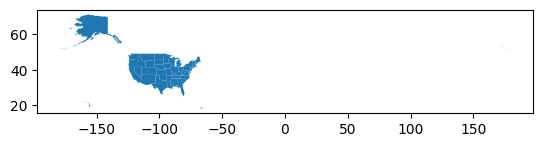

In [10]:
country.plot()


- As you may see, the US map is relatively small compared to the frame. It's because the information includes Alaska, Hawaii and Puerto Rico, which spread out around. For this tutorial purpose, you can exclude Alaska and Hawaii as the hurricane did not go anywhere near those two states. You can also add the figure size and color to customize your own plot:

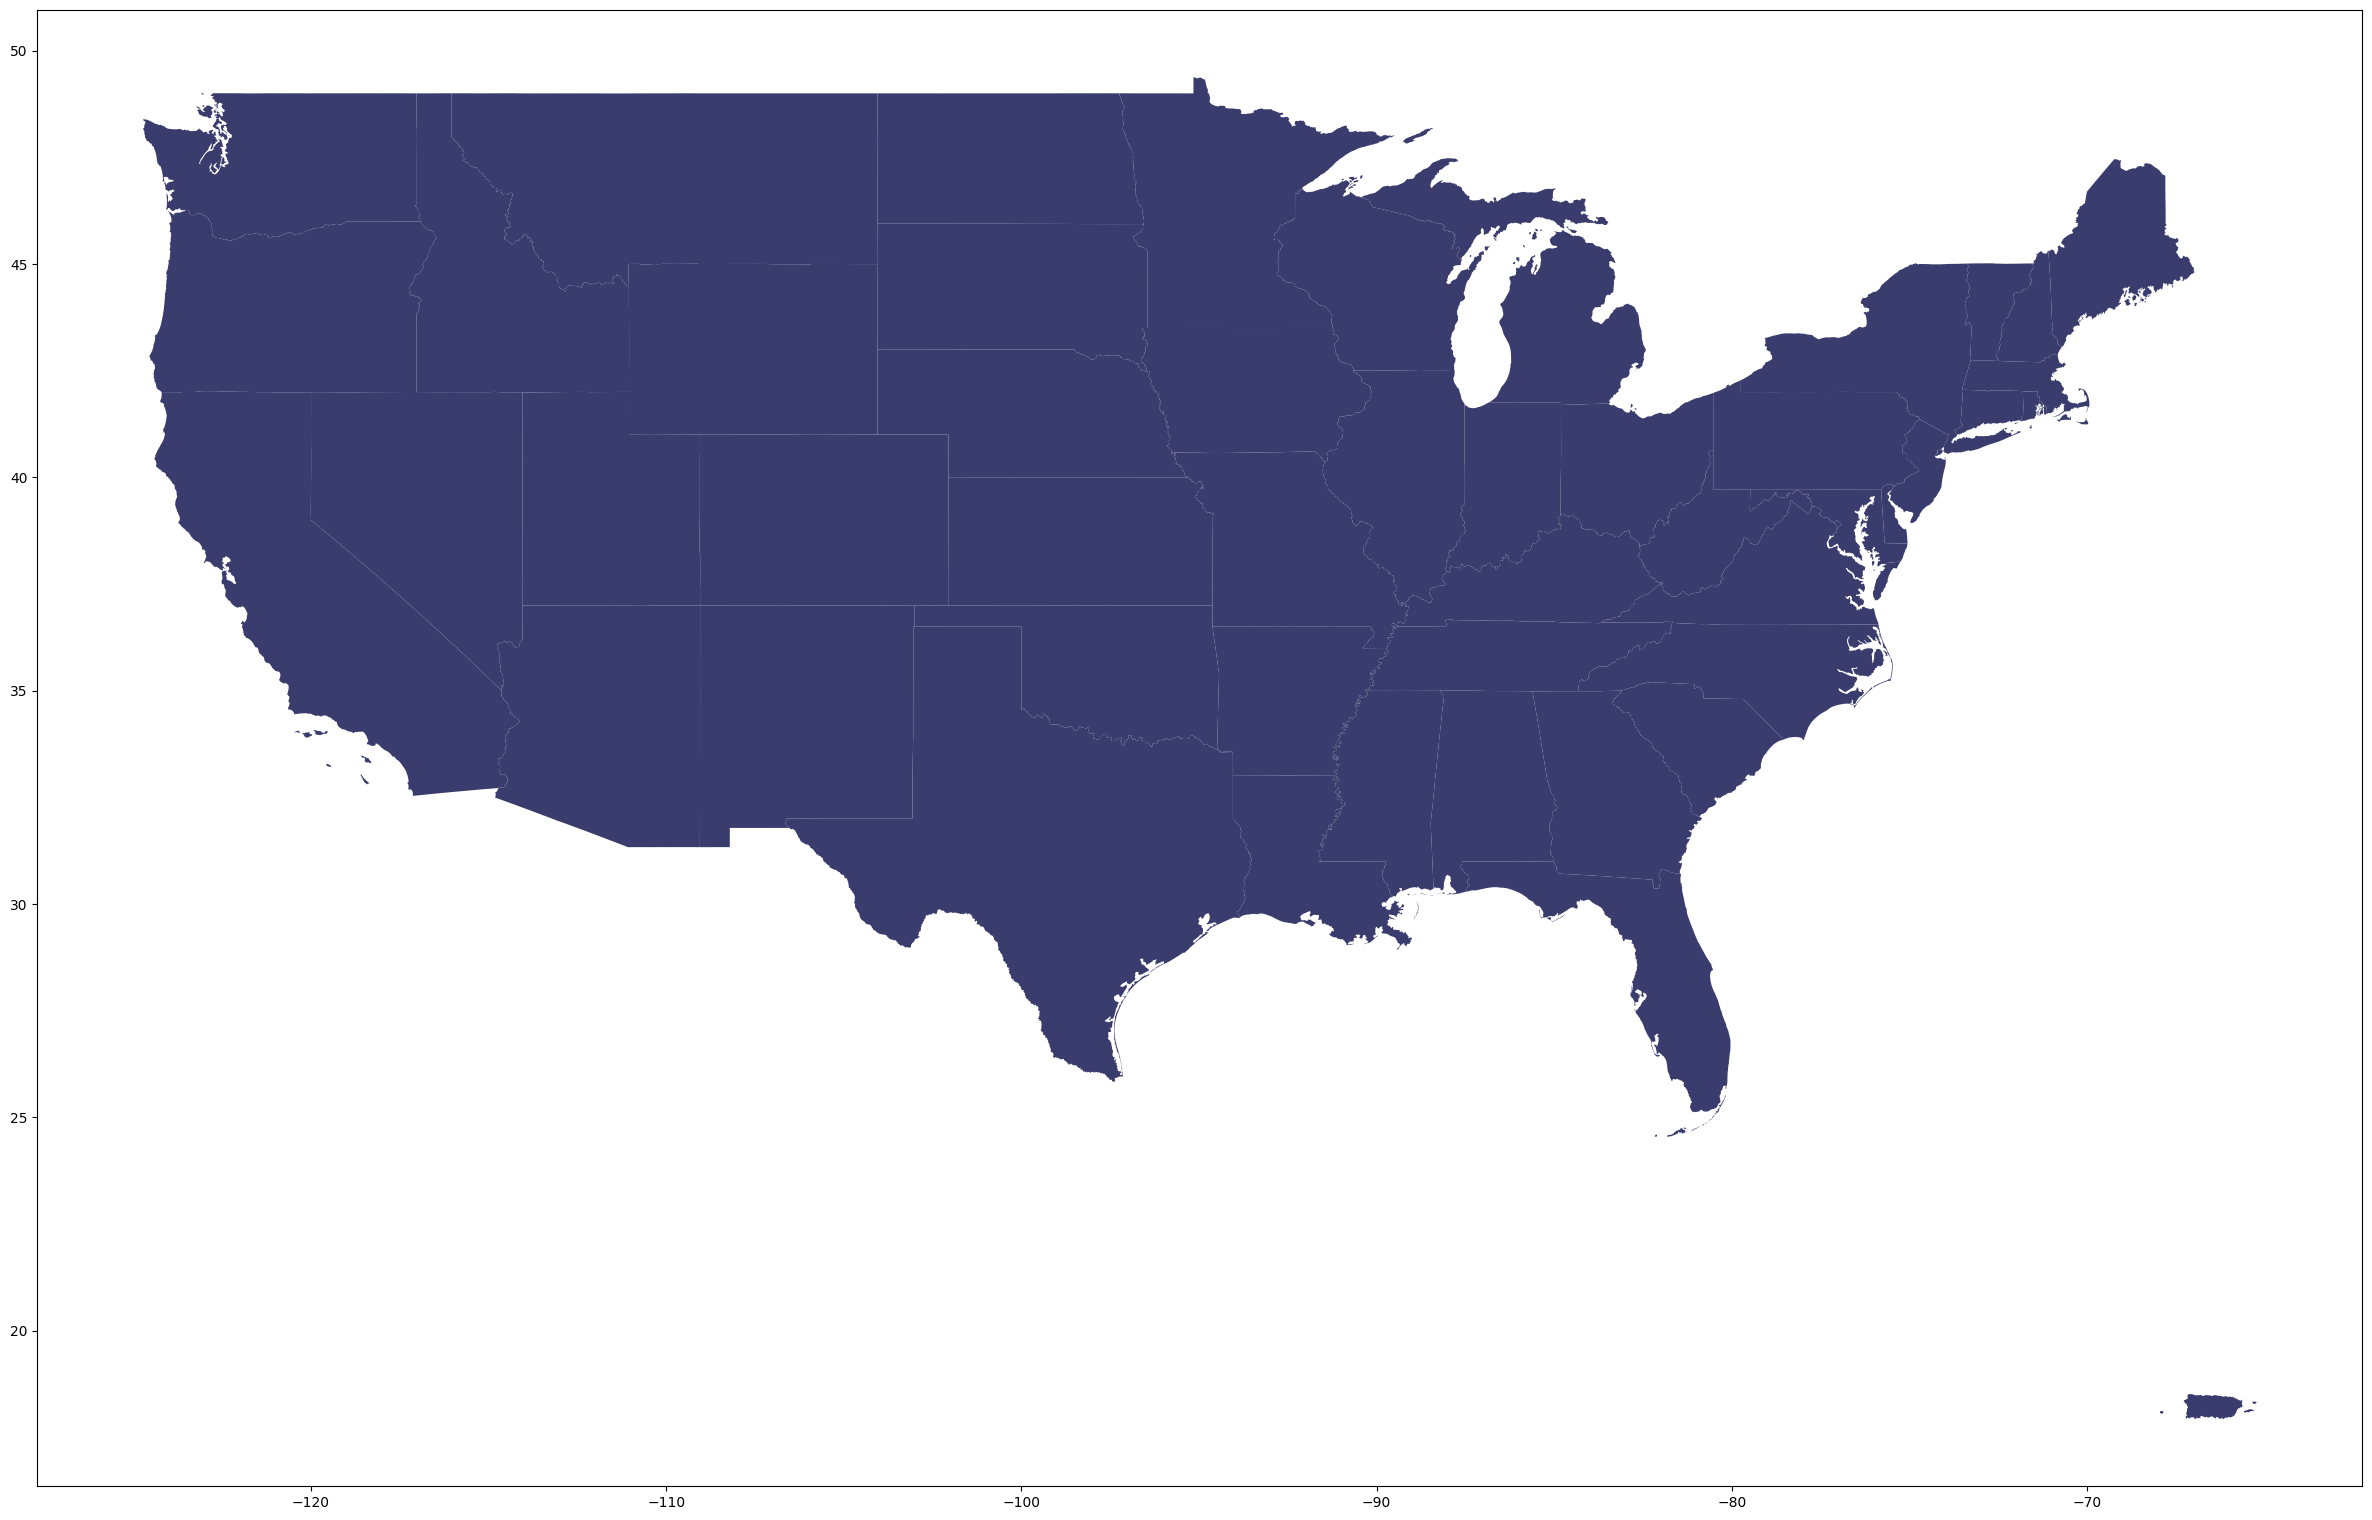

In [11]:
# Exclude Alaska and Hawaii for now
country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(figsize=(30,20), color='#3B3C6E');


In [12]:
import requests
import pandas as pd
from io import StringIO

# URL of the page
url = "https://flhurricane.com/cyclone/stormhistory.php?p=1&year=2018&storm=6"

# Read the page content
response = requests.get(url)
html_content = response.text

# Extract CSV section from the HTML (between the quotes of "AdvisoryNumber" and the end of the CSV)
start = html_content.find('"AdvisoryNumber"')
end = html_content.find("</pre>")
csv_data = html_content[start:end].strip()

# Load into pandas
florence = pd.read_csv(StringIO(csv_data))

# Show preview
print(florence.head())

# Save to CSV
florence.to_csv("Florence_2018.csv", index=False)
print("\n✅ Dataset saved as Florence_2018.csv")


  AdvisoryNumber              Date   Lat  Long  Wind  Pres  \
0              1  08/30/2018 11:00  12.9  18.4    30  1007   
1             1A  08/30/2018 14:00  12.9  19.0    30  1007   
2              2  08/30/2018 17:00  12.9  19.4    30  1007   
3             2A  08/30/2018 20:00  13.1  20.4    30  1007   
4              3  08/30/2018 23:00  13.2  20.9    35  1007   

                Movement                        Type Name          Received  \
0  W at 12 MPH (280 deg)  Potential Tropical Cyclone  Six  08/30/2018 10:45   
1  W at 12 MPH (280 deg)  Potential Tropical Cyclone  Six  08/30/2018 13:36   
2   W at 9 MPH (280 deg)  Potential Tropical Cyclone  Six  08/30/2018 16:36   
3  W at 11 MPH (280 deg)  Potential Tropical Cyclone  Six  08/30/2018 19:44   
4  W at 13 MPH (280 deg)  Potential Tropical Cyclone  Six  08/30/2018 22:42   

  Forecaster  
0      Avila  
1      Avila  
2      Avila  
3      Beven  
4      Beven  

✅ Dataset saved as Florence_2018.csv


# EDA

- Checking the information, data type
- Any missing value
- Statistical data

In [13]:
florence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AdvisoryNumber  105 non-null    object 
 1   Date            105 non-null    object 
 2   Lat             105 non-null    float64
 3   Long            105 non-null    float64
 4   Wind            105 non-null    int64  
 5   Pres            105 non-null    int64  
 6   Movement        105 non-null    object 
 7   Type            105 non-null    object 
 8   Name            105 non-null    object 
 9   Received        105 non-null    object 
 10  Forecaster      104 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 9.2+ KB


<Axes: >

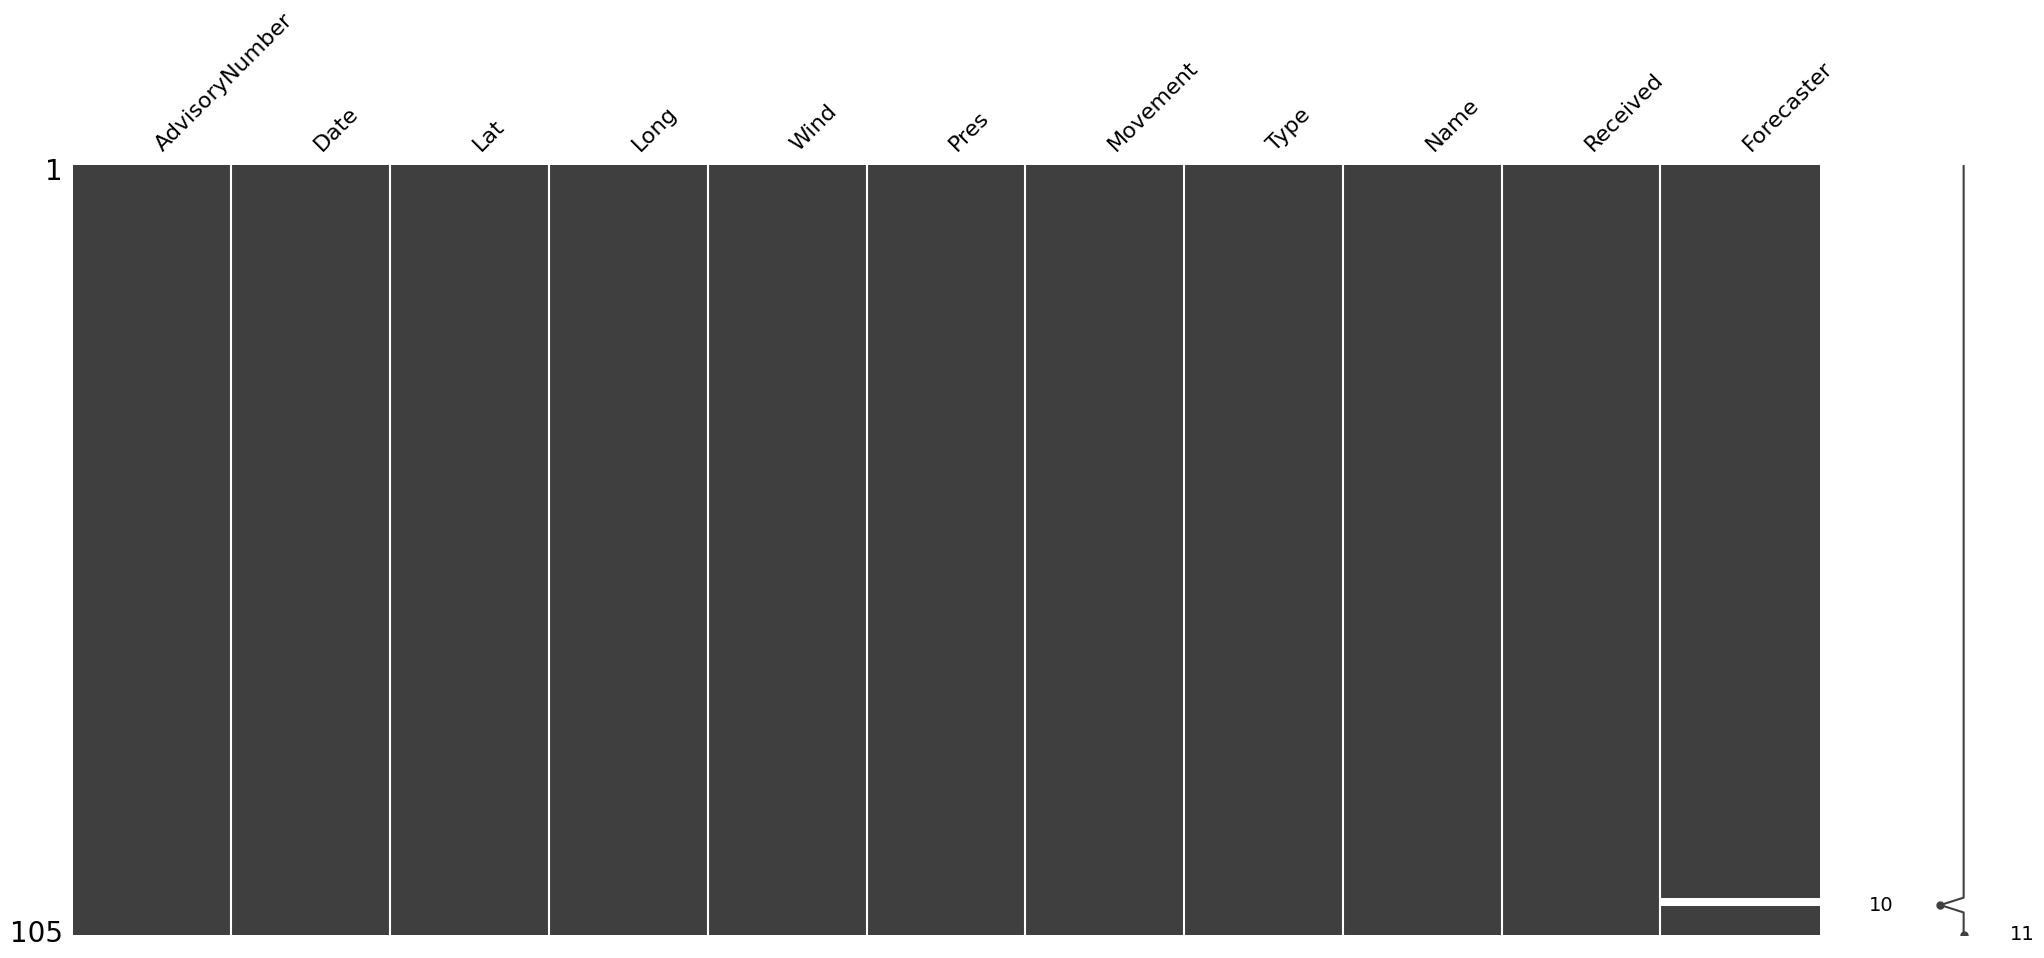

In [14]:
# missing values using missingno package.
msn.matrix(florence)

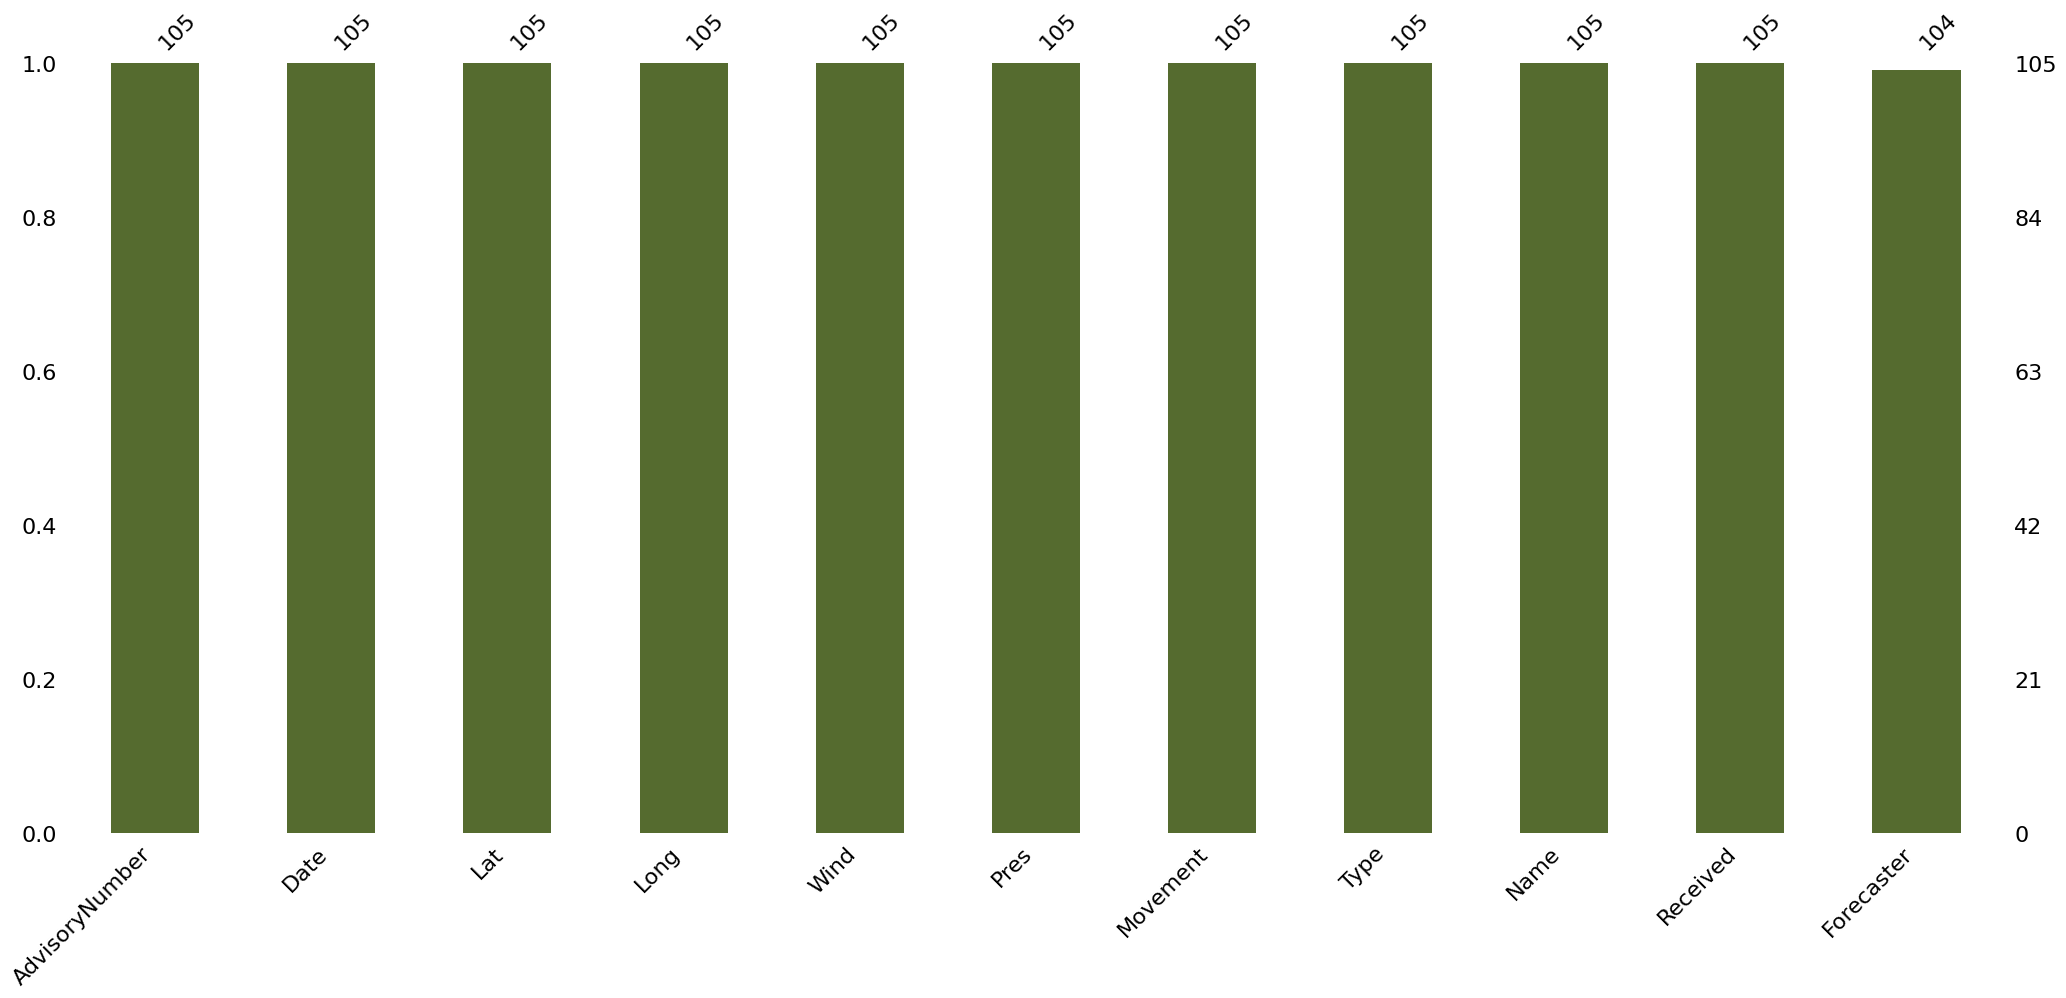

In [15]:
# Notice you can always adjust the color of the visualization
msn.bar(florence, color='darkolivegreen');

In [16]:
# Statistical information
florence.describe()

,Lat,Long,Wind,Pres
count,105.000000,105.000000,105.000000,105.000000
mean,25.931429,56.938095,74.428571,981.571429
std,7.975917,20.878865,36.560765,22.780667
min,12.900000,18.400000,25.000000,939.000000
25%,18.900000,41.000000,40.000000,956.000000
50%,25.100000,60.000000,70.000000,989.000000
75%,33.600000,76.400000,105.000000,1002.000000
max,42.600000,82.900000,140.000000,1008.000000


- For most data, you will need to clean up and take only what you need to work on. Here, you only need the time, the coordinates: latitude and longitude, Wind speed, Pressure, and Name. Movement and Type are optional, but the rest could be dropped.

In [17]:
# dropping all unused features:
florence = florence.drop(['AdvisoryNumber', 'Forecaster', 'Received'], axis=1)
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
1,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six
3,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six
4,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six


- Normally, if you plot the data by itself, there is no need to take extra care for the coordinate. However, if you want it to look similar to how you look on the map, it's important to check on the longitude and latitude. Here the longitude is west, you will need to add "-" in front of the number to correctly plot the data:

In [18]:
# Add "-" in front of the number to correctly plot the data:
florence['Long'] = 0 - florence['Long']
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six


- Then you can combine Lattitude and Longitude to create hurricane coordinates, which will subsequently be turned into GeoPoint for visualization purpose.

In [19]:
# Combining Lattitude and Longitude to create hurricane coordinates:
florence['coordinates'] = florence[['Long', 'Lat']].values.tolist()
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,"[-18.4, 12.9]"
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,"[-19.0, 12.9]"
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,"[-19.4, 12.9]"
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,"[-20.4, 13.1]"
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,"[-20.9, 13.2]"


In [20]:
# Change the coordinates to a geoPoint
florence['coordinates'] = florence['coordinates'].apply(Point)
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.4 12.9)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19 12.9)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.4 12.9)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.4 13.1)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.9 13.2)


- Checking the type of the florence dataframe and column coordinates of florence data. It's pandas DataFrame and pandas Series.

In [21]:
type(florence)

pandas.core.frame.DataFrame

In [22]:
type(florence['coordinates'])

pandas.core.series.Series

- After converting the data into geospatial data, we will check the type of florence dataframe and column coordinates of Florence data again. Now it's Geo DataFrame and GeoSeries.

In [24]:
# Convert the count df to geodf
florence = gpd.GeoDataFrame(florence, geometry='coordinates')
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.4 12.9)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19 12.9)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.4 12.9)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.4 13.1)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.9 13.2)


In [25]:
type(florence)

geopandas.geodataframe.GeoDataFrame

In [26]:
type(florence['coordinates'])

geopandas.geoseries.GeoSeries

- Notice that even though it's now a Geo DataFrame and Geo Series, it still behaves like a normal DataFrame and a Series. This means you can still perform filtering, groupby for the dataframe or extract the min, max, or mean values of the column.

In [27]:
# Filtering from before the hurricane was named.
florence[florence['Name']=='Six']

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.4 12.9)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19 12.9)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.4 12.9)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.4 13.1)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.9 13.2)
5,08/31/2018 02:00,13.4,-21.2,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-21.2 13.4)
6,08/31/2018 05:00,13.6,-21.4,35,1006,WNW at 12 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-21.4 13.6)
7,08/31/2018 08:00,13.7,-21.8,35,1006,WNW at 12 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-21.8 13.7)
8,08/31/2018 11:00,13.7,-22.7,35,1006,WNW at 13 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-22.7 13.7)
9,08/31/2018 14:00,13.8,-23.3,35,1006,WNW at 13 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-23.3 13.8)


In [28]:
# Groupping by name to see how many names it has in the data set:
florence.groupby('Name').Type.count()

,Type
Name,
FLORENCE,6
Florence,85
SIX,4
Six,10


- Finding the mean wind speed of hurrican Florence:



In [29]:
print("Mean wind speed of Hurricane Florence is {} mph and it can go up to {} mph maximum".format(round(florence.Wind.mean(),4),
                                                                                         florence.Wind.max()))

Mean wind speed of Hurricane Florence is 74.4286 mph and it can go up to 140 mph maximum


- So the average wind speed of hurricane Florence is 74.43 miles per hour (119.78 km per hour) and the maximum is 140 miles per hour (225.308 km per hour). To imagine how scary this wind speed is, the website Beaufort Wind Scale, developed by U.K Royal Navy, shows the appearance of wind effects on the water and on land. With the speed of 48 to 55 miles per hours, it can already break and uproot trees, and cause "considerable structural damage".

- You don't want to be there at this moment.



# Visualization

- Similar to pandas Dataframe, a GeoDataFrame also has .plot attribute. However, this attribute makes use of the coordinate within the GeoDataFrame to map it out. Let's take a look:

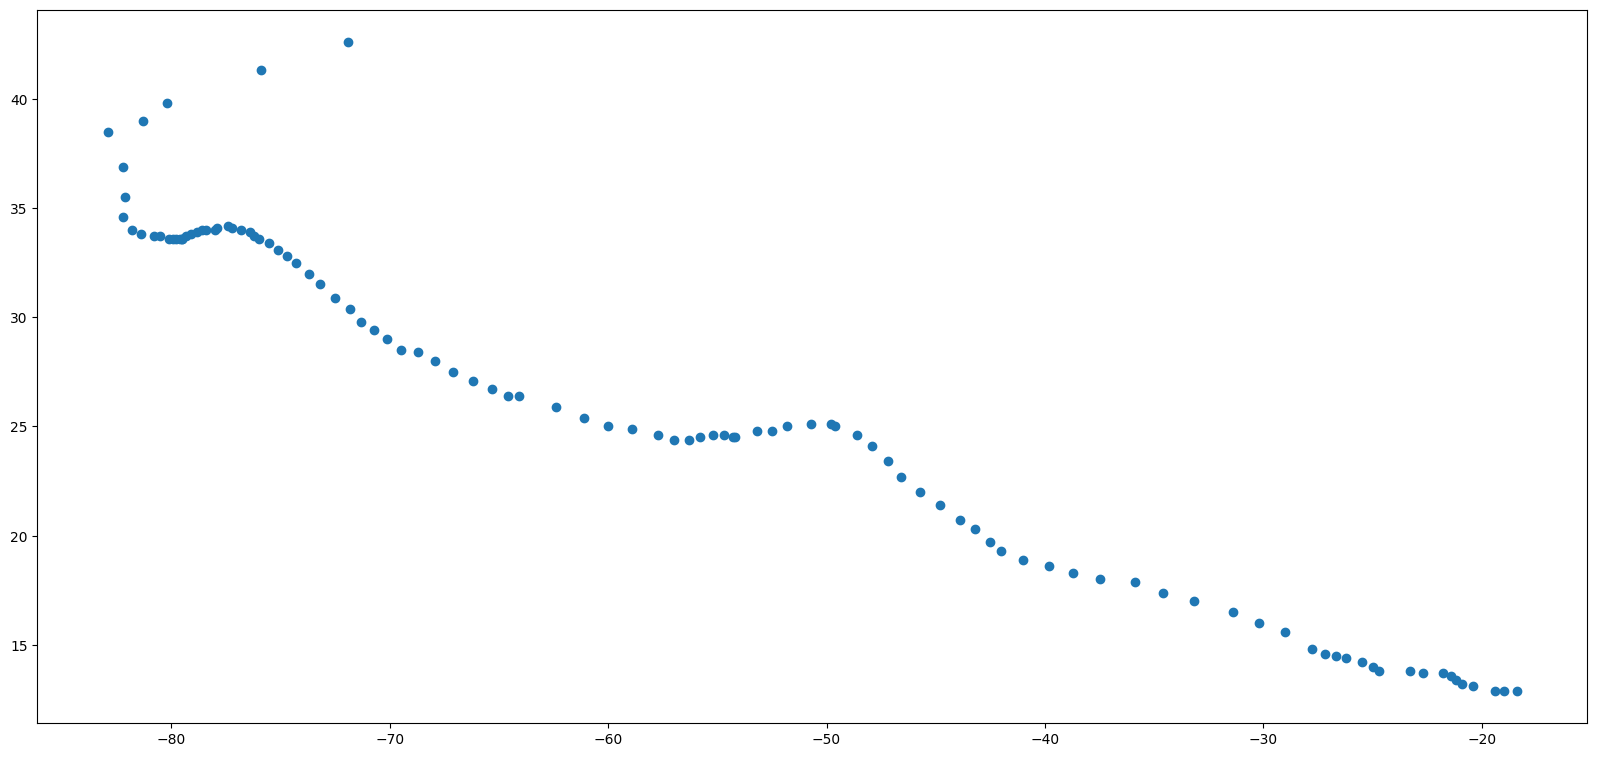

In [30]:
florence.plot(figsize=(20,10));


- What happened? All you can see is a bunch of points with no navigation. Is there anything wrong?
No, it's all fine. Because this dataframe only have coordinates information (location) of hurricane Florence at each time point, we can only plot the position on a blank map.

So, the next step is plotting the hurricane position on the US map to see where it hit and how strong it was at that time. To do so, you will use the US map coordinates (data we loaded in the beginning) as the base and plotting hurricane Florence position on top of it.

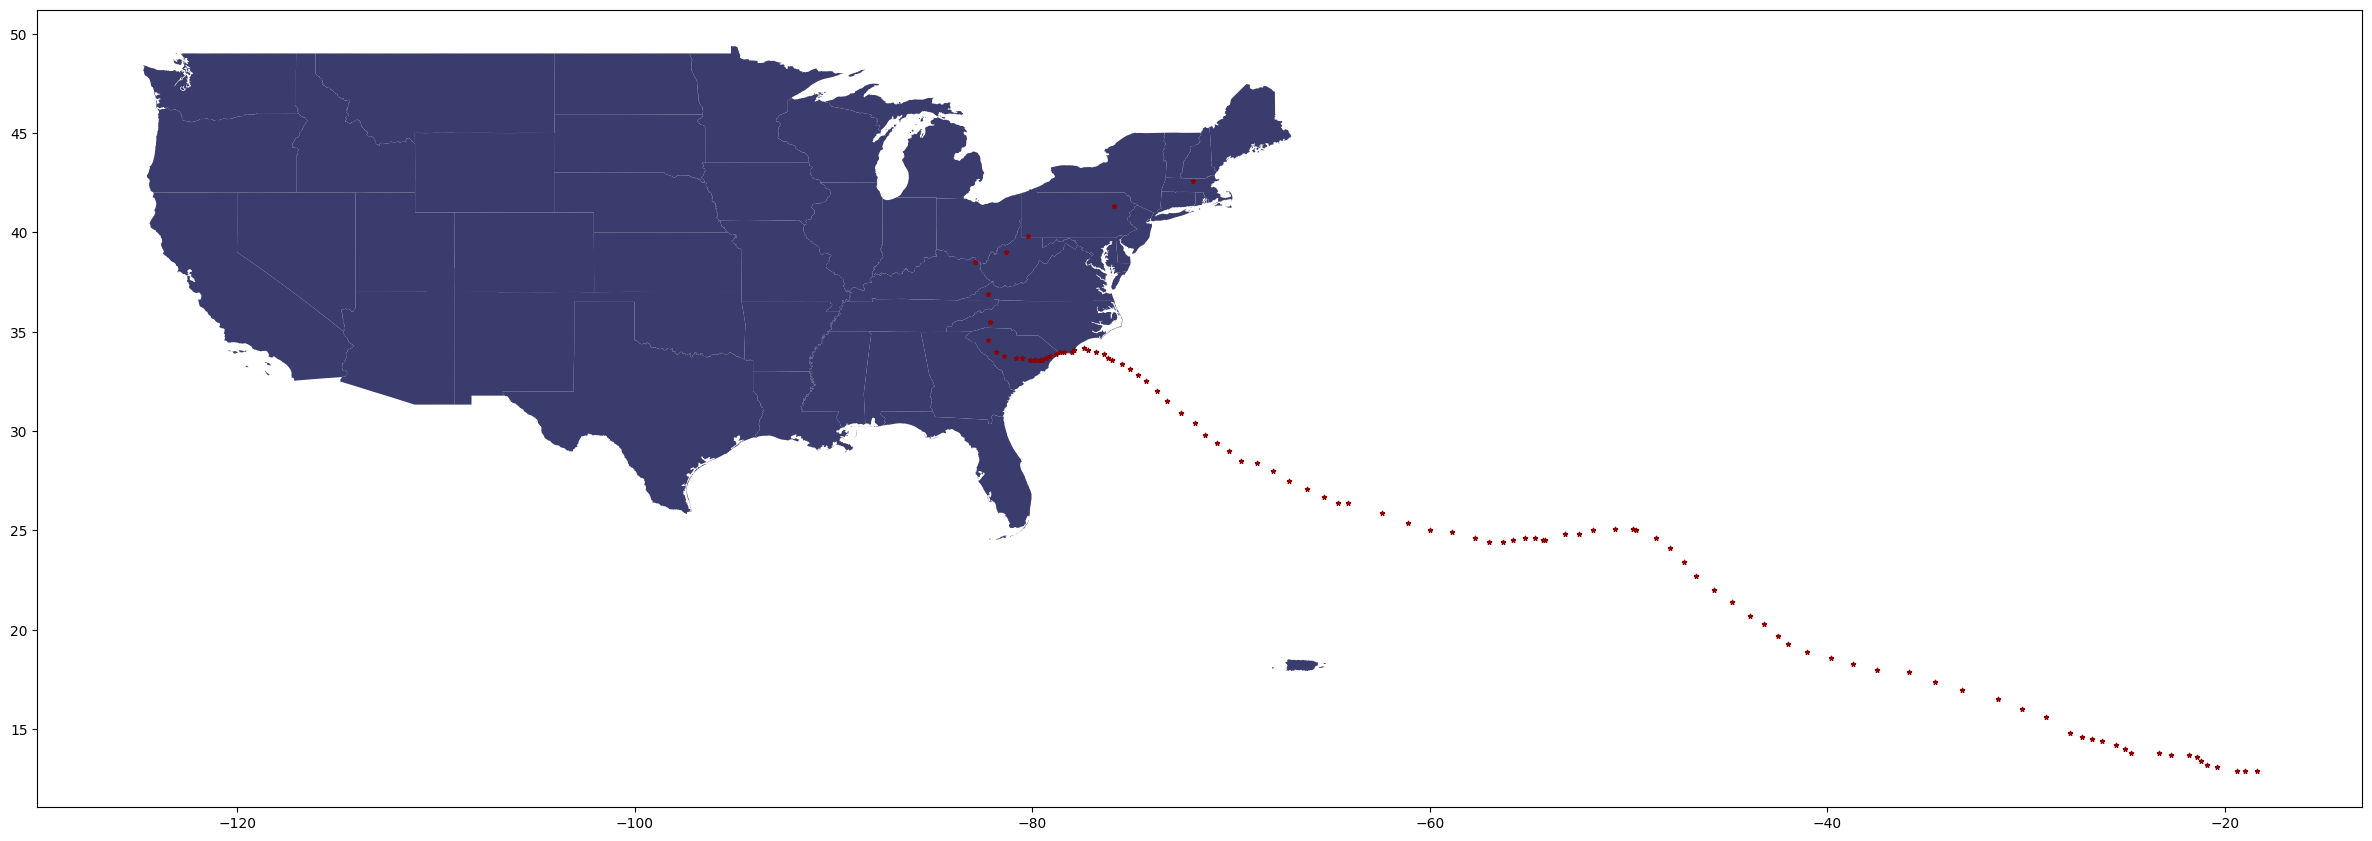

In [31]:
 # Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')

# plotting the hurricane position on top with red color to stand out:
florence.plot(ax=base, color='darkred', marker="*", markersize=10);

- Looks great! Now, we will finish it with more details such as:

Adding title,
Color the hurricane position based on the wind speed to see how strong the hurricane was when it hit each city.

 Remove axis,
Add legend,
Saving the result to an image file to use later

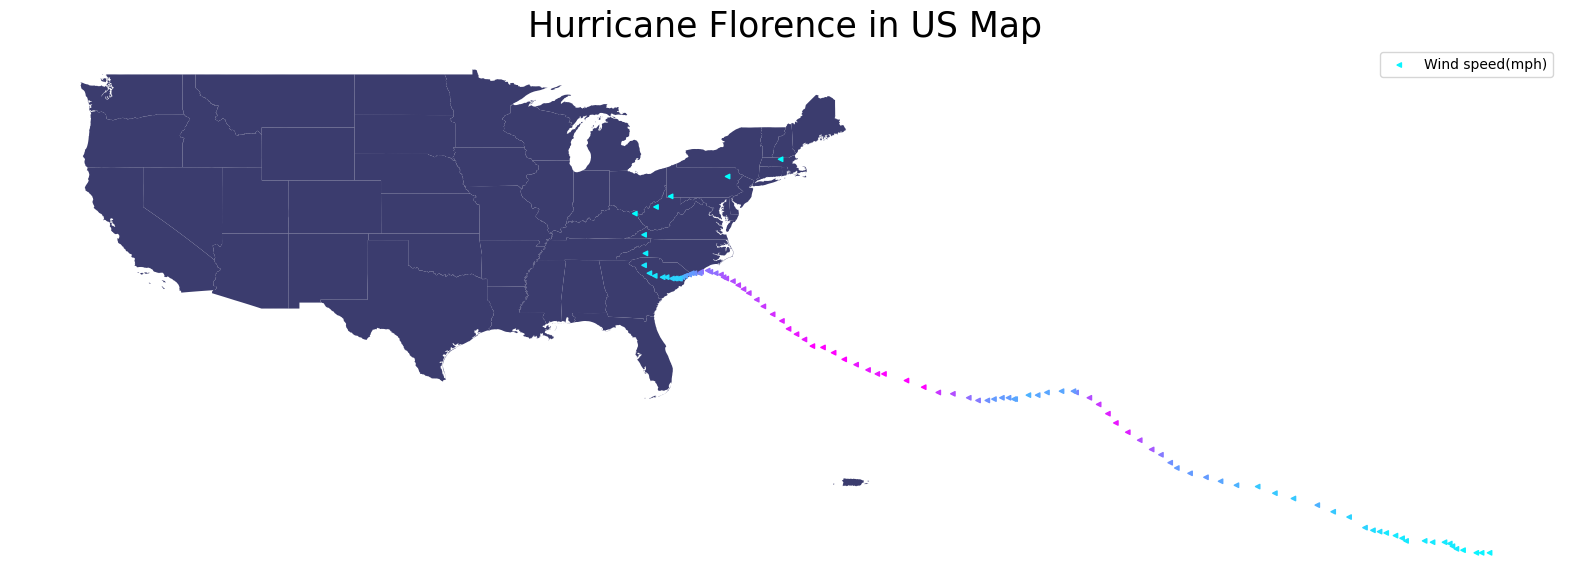

In [32]:
 fig, ax = plt.subplots(1, figsize=(20,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')
florence.plot(ax=base, column='Wind', marker="<", markersize=10, cmap='cool', label="Wind speed(mph)")
_ = ax.axis('off')
plt.legend()
ax.set_title("Hurricane Florence in US Map", fontsize=25)
plt.savefig('Hurricane_footage.png',bbox_inches='tight');

In [38]:

# User-provided URL for the storm history data
url_florence = "https://flhurricane.com/cyclone/stormhistory.php?p=1&year=2018&storm=6"

response = requests.get(url_florence)
response.raise_for_status()

# Extract CSV section from the HTML (between the quotes of "AdvisoryNumber" and the end of the CSV)
# This is the original method used in the notebook to parse this specific website's data.
html_content_full = response.text
start = html_content_full.find('"AdvisoryNumber"')
end = html_content_full.find('</pre>') # Assuming the CSV ends before a </pre> tag

# If </pre> is not found, try to find the end of the CSV block more robustly
if end == -1:
    # Fallback if </pre> isn't present or reliable, look for the last line that looks like data
    csv_lines = html_content_full[start:].split('\n')
    cleaned_csv_lines = [line for line in csv_lines if line.strip() and not line.strip().startswith('<')]
    csv_data = '\n'.join(cleaned_csv_lines)
else:
    csv_data = html_content_full[start:end].strip()

# Load into pandas using StringIO as if it were a file
df_florence = pd.read_csv(StringIO(csv_data))

# --- No need for df_florence.columns = df_florence.iloc[0] and df_florence = df_florence[1:].copy()
#    because pd.read_csv handles headers correctly if the first line is the header ---

# Clean up column names - ensure they are strings before stripping whitespace
df_florence.columns = [str(col).strip() for col in df_florence.columns]

# Drop rows that are entirely NaN
df_florence.dropna(how='all', inplace=True)

# Add the year '2018' to the Date string and parse with correct format
df_florence['Date_Full'] = df_florence['Date'].astype(str) # No need to append ' 2018' if it's already there
# The date format from this specific CSV string is 'MM/DD/YYYY HH:MM'
df_florence['DateTime'] = pd.to_datetime(df_florence['Date_Full'], format='%m/%d/%Y %H:%M', errors='coerce')

# Clean 'Lat' and 'Long' columns
# Longitude needs to be negative for locations west of the Prime Meridian.
# The 'Long' column from this CSV is *not* already negative, so we need to multiply by -1.
df_florence['Lat'] = pd.to_numeric(df_florence['Lat'], errors='coerce')
df_florence['Long'] = pd.to_numeric(df_florence['Long'], errors='coerce') * -1 # Corrected: multiply by -1

# Filter for the specified date range for Hurricane Florence 2018
start_date = pd.to_datetime('2018-08-30')
end_date = pd.to_datetime('2018-09-18')

df_florence_filtered = df_florence[
    (df_florence['DateTime'] >= start_date) &
    (df_florence['DateTime'] <= end_date)
].copy()

# Convert Wind, Pres to numeric, coercing errors
df_florence_filtered['Wind'] = pd.to_numeric(df_florence_filtered['Wind'], errors='coerce')
df_florence_filtered['Pres'] = pd.to_numeric(df_florence_filtered['Pres'], errors='coerce')

# Drop rows with NaN values in critical columns after conversion
df_florence_filtered.dropna(subset=['Lat', 'Long', 'DateTime', 'Wind'], inplace=True)

# Create florence_gdf (GeoDataFrame for hurricane track)
geometry = [Point(xy) for xy in zip(df_florence_filtered['Long'], df_florence_filtered['Lat'])]
florence_gdf = gpd.GeoDataFrame(df_florence_filtered, geometry=geometry, crs="EPSG:4326")

# Ensure 'country' GeoDataFrame is available from the main notebook scope
# (assuming it was loaded previously in cell MCM6KKi-R6za and updated in eXNWU9fei7or)
# If 'country' is not defined, you might need to re-run cell MCM6KKi-R6za.
# If 'country_mainland' isn't defined, create it here.
if 'country' not in locals() or 'country_mainland' not in locals():
    print("Warning: 'country' or 'country_mainland' not found. Re-loading US states data.")
    url_us_states = "https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json"
    response_us = requests.get(url_us_states)
    response_us.raise_for_status()
    with open("gz_2010_us_500_11_20m.json", "wb") as f:
        f.write(response_us.content)
    country = gpd.read_file("gz_2010_us_500_11_20m.json")
    country_mainland = country[country['NAME'].isin(['Alaska','Hawaii']) == False].copy()

# Reproject GeoDataFrames to Web Mercator (EPSG:3857) for contextily basemap
florence_gdf_proj = florence_gdf.to_crs(epsg=3857)
country_mainland_proj = country_mainland.to_crs(epsg=3857)

# --- End: Data Loading and Preparation ---


# Sort the data by DateTime to ensure correct animation sequence
florence_gdf_proj_sorted = florence_gdf_proj.sort_values(by='DateTime').reset_index(drop=True)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Set the extent of the map to focus on the hurricane's path
minx, miny, maxx, maxy = florence_gdf_proj_sorted.total_bounds
ax.set_xlim(minx - 1000000, maxx + 1000000) # Added more buffer for better view
ax.set_ylim(miny - 1000000, maxy + 1000000)

# Add a static basemap using contextily (rendered once)
cx.add_basemap(ax, crs=florence_gdf_proj_sorted.crs, source=cx.providers.Esri.WorldImagery)

# Initialize an empty plot for the hurricane path and current point
line, = ax.plot([], [], color='red', linewidth=3, zorder=3)
current_point = ax.scatter([], [], marker='*', s=300, color='yellow', edgecolor='black', zorder=4)

# Add a text annotation for date/time
txt = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=15, color='white', ha='left', va='top', bbox=dict(facecolor='black', alpha=0.6, edgecolor='none'))

ax.set_title('Path of Hurricane Florence (2018)', fontsize=16, color='white')
ax.set_xlabel('Longitude (Projected)', fontsize=12, color='white')
ax.set_ylabel('Latitude (Projected)', fontsize=12, color='white')
ax.set_facecolor('black') # To ensure axis labels are visible against a potentially dark basemap
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

plt.tight_layout()

def update(frame):
    current_data = florence_gdf_proj_sorted.iloc[:frame+1]

    if not current_data.empty:
        # Update line path
        line.set_data(current_data.geometry.x, current_data.geometry.y)

        # Update current point (last point in current_data)
        last_point = current_data.iloc[-1]
        current_point.set_offsets([last_point.geometry.x, last_point.geometry.y])
        # Use current_point.set_color to avoid issues with colormap if 'c' was passed initially
        current_point.set_color(plt.cm.YlOrRd(last_point['Wind'] / florence_gdf_proj_sorted['Wind'].max())) # Color by wind speed
        current_point.set_sizes([last_point['Wind'] * 2]) # Size by wind speed

        # Update date/time text
        txt.set_text(last_point['DateTime'].strftime('%Y-%m-%d %H:%M'))

    return line, current_point, txt

# Create the animation (lower interval for faster animation)
# The number of frames should be the number of data points
ani = FuncAnimation(fig, update, frames=len(florence_gdf_proj_sorted),
                    blit=True, interval=100, repeat=False)

plt.close(fig) # Close the plot to avoid displaying the static initial frame

# Display the animation in the notebook
# HTML(ani.to_jshtml())

# To save as GIF (requires imagemagick or pillow, or ffmpeg for mp4)
# ani.save('hurricane_florence_animation.gif', writer='imagemagick', fps=10)
# To save as MP4 (requires ffmpeg)
ani.save('hurricane_florence_animation.mp4', writer='ffmpeg', fps=10)

print("Animation created and saved as 'hurricane_florence_animation.mp4'")

Animation created and saved as 'hurricane_florence_animation.mp4'
